In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
dir_path = 'F:\\'
os.chdir(dir_path)

In [2]:
train = pd.read_csv('C:/Users/ADMIN11/Desktop/csv/Hotel review/train.csv')

In [3]:
train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
train.shape

(38932, 5)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [6]:
train.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id21522,1
Description,38932,38932,The area is very busy but it is hotel is very ...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


* user id and description are the 2 importsnt columns. Both have unique values
* our target variable is going to be is response column

Next we ll check the nature of values in different columns, analyse if there are null values in short go in for some data cleaning

In [7]:
train.Device_Used.value_counts()

Desktop    15026
Mobile     14976
Tablet      8930
Name: Device_Used, dtype: int64

In [8]:
train.Is_Response.value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [9]:
def san():
    print('Sanity Check')

In [10]:
def clean(x):
    if x.isnull().sum().all()==0:
        print('Data is Clean')
    else:
        print('Data needs some attention with cleaning techniques')
clean(train)

Data is Clean


In [11]:
def analyse_null(data):
    count = data.isnull().sum().sort_values(ascending=False)
    percentage = (count/len(data))*100
    matrix = pd.concat([count,percentage], axis=1, keys=['Count','Percentage of missing values'])
    return matrix
print('Another way to analyse missing values')

analyse_null(train)

Another way to analyse missing values


,Count,Percentage of missing values
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


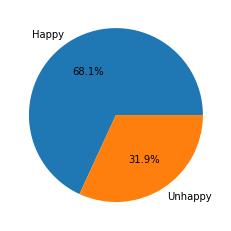

70% population is happy
 and 30% unhappy


In [12]:
def target_analysis(var):
    reviewper = ((var['Is_Response'].value_counts()/len(var))*100).round(2)
    plt.pie(reviewper, autopct='%1.1f%%', labels=['Happy','Unhappy'])
    plt.show()
target_analysis(train)
print('70% population is happy\n and 30% unhappy')

In [13]:
train = train.drop(['User_ID','Browser_Used','Device_Used'],axis=1)

In [14]:
san()
train.head()

Sanity Check


,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


* Next we will apply some NLP cleaning techniques

In [15]:
import re
import string

In [16]:
def text_cleaning(text):
    text = text.lower()
    text = re.sub('\[.?:_*\]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
clean_data = lambda x: text_cleaning(x)

In [17]:
train['Clean_data'] = train['Description'].apply(clean_data)

In [18]:
san()
train.iloc[:5]

Sanity Check


,Description,Is_Response,Clean_data
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


In [19]:
def text_cleaning2(text):
    text = re.sub('\n','',text)
    return text
clean_data2 = lambda x: text_cleaning(x)

In [20]:
train['Clean_description'] = train['Clean_data'].apply(clean_data2)

In [21]:
train.drop(['Description','Clean_data'], axis=1, inplace=True)

In [22]:
train.iloc[:3]

,Is_Response,Clean_description
0,not happy,the room was kind of clean but had a very stro...
1,not happy,i stayed at the crown plaza april april th...
2,not happy,i booked this hotel through hotwire at the low...


In [32]:
columns = ['Clean_description','Is_Response']

In [33]:
df = pd.DataFrame(data = train,columns = columns)

In [34]:
df.head()

,Clean_description,Is_Response
0,the room was kind of clean but had a very stro...,not happy
1,i stayed at the crown plaza april april th...,not happy
2,i booked this hotel through hotwire at the low...,not happy
3,stayed here with husband and sons on the way t...,happy
4,my girlfriends and i stayed here to celebrate ...,not happy


* Model Building

In [35]:
from sklearn.model_selection import train_test_split
x = df['Clean_description']
y = df['Is_Response']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1689)


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

In [37]:
tfidf = TfidfVectorizer()
lgclf = LogisticRegression()
dclf = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [38]:
classifiers = [lgclf,dclf,knn]

In [39]:
model = Pipeline([('vectorizer', tfidf),('classifier', lgclf)])

model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [40]:
pred = model.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

In [42]:
cm

array([[4950,  335],
       [ 561, 1941]], dtype=int64)

In [43]:
from sklearn.metrics import *

In [44]:
accuracy = accuracy_score(pred,y_test)
accuracy

0.8849364325157314

In [45]:
precision = precision_score(pred,y_test,average='weighted')
precision

0.889604264996304

In [46]:
recall = recall_score(pred,y_test, average='weighted').round(2)
recall

0.88

* we can iterate over different classifiers and achive the desired results in the following manner

In [175]:
for clf in classifiers:
    model = Pipeline([('vectorizer', tfidf),('classifier', clf)])
    model.fit(x_train,y_train)

    pred = model.predict(x_test)
    print(clf.__class__.__name__,'Accuracy Score :',accuracy_score(y_test,pred))
    print(clf.__class__.__name__,'Precision: ', precision_score(y_test,pred,average='weighted'))
    print(clf.__class__.__name__,'Recall: ',recall_score(y_test,pred, average='weighted'))
    

LogisticRegression Accuracy Score : 0.8849364325157314
LogisticRegression Precision:  0.8836190431363409
LogisticRegression Recall:  0.8849364325157314
DecisionTreeClassifier Accuracy Score : 0.7416206498009503
DecisionTreeClassifier Precision:  0.741675079935087
DecisionTreeClassifier Recall:  0.7416206498009503
KNeighborsClassifier Accuracy Score : 0.7504815718505201
KNeighborsClassifier Precision:  0.7484432367397019
KNeighborsClassifier Recall:  0.7504815718505201


In [181]:
Accuracy = [0.8849364325157314,0.7416206498009503,0.7504815718505201]
Precision = [0.8836190431363409,0.74167507993508,0.7484432367397019]
Recall = [0.8849364325157314,0.7416206498009503,0.7504815718505201]
index = ['Logistic','DecisionTree','K-Neighbors']
Results = pd.DataFrame(data = [Accuracy,Precision,Recall],
                       index = ['Accuracy','Precision','Recall'],
                      columns = index)
Results

,Logistic,DecisionTree,K-Neighbors
Accuracy,0.884936,0.741621,0.750482
Precision,0.883619,0.741675,0.748443
Recall,0.884936,0.741621,0.750482


In [171]:
check = ['the hotel was not so bad but clean i enjoyed the stay it was not great']
result = model.predict(check)
print(result)

['happy']


* though the scores are pretty good but still the model is not performing upto our expectations. Hence i would go in for more nlp techniques before fitting any other model to this 